In [1]:
from utils import *

In [2]:
CONST_COLUMNS = [ 
                  'Stellensubart_1', 
                  'Stellensubart_2',
                  'Stellensubart_3', 
                  'Stellensubart_4', 
                  'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9',
                  'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19',
                  'T20', 'T21', 'T22', 'T23', 'T24', 'T25', 'T26', 'T27', 'T28', 'T29',
                  'T30', 'T31', 'T32', 'T33', 'T34',
                  'Preis',
                  'Beleuchtet', 
                  'Laenge', 
                  'Breite', 
                  'Eigenfläche',
                  'PPSVACWert',
                  'Qid',
                  'GJ']

In [3]:
data = pd.read_pickle("data/df_gesamt_15_08_prepocessed_einworner_added.pkl")    

In [4]:
distance_2018 = pd.read_csv("./data/distances/distances_2018_truncated.csv").set_index("Qid1")
distance_2019 = pd.read_csv("./data/distances/distances_2019_truncated.csv").set_index("Qid1")
distance_2020 = pd.read_csv("./data/distances/distances_2020_truncated.csv").set_index("Qid1")
distance_2021 = pd.read_csv("./data/distances/distances_2021_truncated.csv").set_index("Qid1")
distance_2022 = pd.read_csv("./data/distances/distances_2022_truncated.csv").set_index("Qid1")

In [5]:
year_count = data.groupby(["Qid"])["GJ"].count()

In [6]:
cleaned_data = data[data.Qid.isin(year_count[year_count == 6].index)].copy()

In [7]:
cleaned_data = cleaned_data.sort_values(by=["Qid", "GJ"]).set_index("Qid", drop=False)

In [8]:
cleaned_data = cleaned_data.loc[:, CONST_COLUMNS]

# Normalize cols

In [9]:
# cleaned_data.Preis = (cleaned_data.Preis - cleaned_data.Preis.mean()) / cleaned_data.Preis.std()

In [10]:
cleaned_data.Laenge = (cleaned_data.Laenge - cleaned_data.Laenge.mean()) / cleaned_data.Laenge.std()

In [11]:
cleaned_data.Breite = (cleaned_data.Breite - cleaned_data.Breite.mean()) / cleaned_data.Breite.std()

In [12]:
cleaned_data.PPSVACWert = (cleaned_data.PPSVACWert - cleaned_data.PPSVACWert.mean()) / cleaned_data.PPSVACWert.std()

In [13]:
data_2018 = cleaned_data[cleaned_data.GJ == 2018].drop(columns = ["Qid", "GJ"]).copy()
data_2019 = cleaned_data[cleaned_data.GJ == 2019].drop(columns = ["Qid", "GJ"]).copy()
data_2020 = cleaned_data[cleaned_data.GJ == 2020].drop(columns = ["Qid", "GJ"]).copy()
data_2021 = cleaned_data[cleaned_data.GJ == 2021].drop(columns = ["Qid", "GJ"]).copy()
data_2022 = cleaned_data[cleaned_data.GJ == 2022].drop(columns = ["Qid", "GJ"]).copy()
data_2023 = cleaned_data[cleaned_data.GJ == 2023].drop(columns = ["Qid", "GJ"]).copy()

In [14]:
data_2023.loc[:, "T1":"T22"] = data_2023.loc[:, "T1":"T22"].replace(-1, 0)

In [15]:
all_valid_qids = cleaned_data.Qid

In [16]:
qid_train, qid_val = train_test_split(all_valid_qids, test_size=0.05, random_state=7 )

In [17]:
def min_max(arg):
    return torch.softmax(-torch.from_numpy(arg)*0.1, dim=0).numpy()

# Data Loading

In [10]:
def DataPreprocessor(qids):
    global data_2018, data_2019, data_2020, data_2021, data_2022, data_2023
    global distance_2018, distance_2019, distance_2020, distance_2021, distance_2022
    X, x, y = [], [], []

    for idx, qid in enumerate(tqdm(qids)):

        ##########################################
        neighbours_2018 = distance_2018.loc[qid]

        if isinstance(neighbours_2018, pd.core.series.Series) or (neighbours_2018.shape[0] <= 1):
            continue

        neighbours_2018 = neighbours_2018[neighbours_2018.Qid2 != qid]

        neighbour_distances_2018 = neighbours_2018.distance
        neighbours_2018 = neighbours_2018.Qid2


        #########################################
        neighbours_2019 = distance_2019.loc[qid]

        if isinstance(neighbours_2019, pd.core.series.Series) or (neighbours_2019.shape[0] <= 1):
            continue

        neighbours_2019 = neighbours_2019[neighbours_2019.Qid2 != qid]
        neighbour_distances_2019 = neighbours_2019.distance
        neighbours_2019 = neighbours_2019.Qid2

        #########################################
        neighbours_2020 = distance_2020.loc[qid]

        if isinstance(neighbours_2020, pd.core.series.Series) or (neighbours_2020.shape[0] <= 1):
            continue

        neighbours_2020 = neighbours_2020[neighbours_2020.Qid2 != qid]
        neighbour_distances_2020 = neighbours_2020.distance
        neighbours_2020 = neighbours_2020.Qid2

        #########################################
        neighbours_2021 = distance_2021.loc[qid]

        if isinstance(neighbours_2021, pd.core.series.Series) or (neighbours_2021.shape[0] <= 1):
            continue

        neighbours_2021 = neighbours_2021[neighbours_2021.Qid2 != qid]
        neighbour_distances_2021 = neighbours_2021.distance
        neighbours_2021 = neighbours_2021.Qid2

        #########################################
        neighbours_2022 = distance_2022.loc[qid]

        if isinstance(neighbours_2022, pd.core.series.Series) or (neighbours_2022.shape[0] <= 1):
            continue

        neighbours_2022 = neighbours_2022[neighbours_2022.Qid2 != qid]
        neighbour_distances_2022 = neighbours_2022.distance
        neighbours_2022 = neighbours_2022.Qid2
        #########################################


        neighbours_2018_data = data_2018.loc[neighbours_2018.values].values
        neighbours_2019_data = data_2019.loc[neighbours_2019.values].values
        neighbours_2020_data = data_2020.loc[neighbours_2020.values].values
        neighbours_2021_data = data_2021.loc[neighbours_2021.values].values
        neighbours_2022_data = data_2022.loc[neighbours_2022.values].values


        self_data_2018 = torch.from_numpy(data_2018.loc[qid].values)
        self_data_2019 = torch.from_numpy(data_2019.loc[qid].values)
        self_data_2020 = torch.from_numpy(data_2020.loc[qid].values)
        self_data_2021 = torch.from_numpy(data_2021.loc[qid].values)
        self_data_2022 = torch.from_numpy(data_2022.loc[qid].values)
        self_data_2022 = torch.from_numpy(data_2022.loc[qid].values)
        self_data_2023 = torch.from_numpy(data_2023.loc[qid].drop(labels=["PPSVACWert", *[f"T{i}" for i in range(1, 35)]]).values)



        neighbours_2018_data = torch.from_numpy(min_max(neighbour_distances_2018.values) @ neighbours_2018_data)
        neighbours_2019_data = torch.from_numpy(min_max(neighbour_distances_2019.values) @ neighbours_2019_data)
        neighbours_2020_data = torch.from_numpy(min_max(neighbour_distances_2020.values) @ neighbours_2020_data)
        neighbours_2021_data = torch.from_numpy(min_max(neighbour_distances_2021.values) @ neighbours_2021_data)
        neighbours_2022_data = torch.from_numpy(min_max(neighbour_distances_2022.values) @ neighbours_2022_data)


        data_point_2018 = torch.stack([neighbours_2018_data, self_data_2018], dim=-1)
        data_point_2019 = torch.stack([neighbours_2019_data, self_data_2019], dim=-1)
        data_point_2020 = torch.stack([neighbours_2020_data, self_data_2020], dim=-1)
        data_point_2021 = torch.stack([neighbours_2021_data, self_data_2021], dim=-1)
        data_point_2022 = torch.stack([neighbours_2022_data, self_data_2022], dim=-1)


        neighbours_features = torch.stack([data_point_2018, 
                                           data_point_2019,
                                           data_point_2020, 
                                           data_point_2021, 
                                           data_point_2022,
                                          ])

        label = torch.tensor(data_2023.loc[qid, "T1":"T22"].mean())

        X.append(neighbours_features)
        x.append(self_data_2023)
        y.append(label)
        
    X = torch.stack(X, dim=0)
    x = torch.stack(x, dim=0)
    y = torch.stack(y, dim=0)
    
    return X, x, y


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, path_X, path_x, path_y, p=0.1):
        
        self.data_X = torch.load(path_X)
        self.data_x = torch.load(path_x)
        self.data_y = torch.load(path_y)
    
        self.p = p
        
#         self.price_mean = 20.79664930570157
#         self.price_std = 11.435527335249834
        
    def __getitem__(self, index):
        if torch.rand(1) < self.p:
            return self.__transform(self.data_X[index].clone(), self.data_x[index].clone(), self.data_y[index].clone())
        else:
            return self.data_X[index], self.data_x[index], self.data_y[index]
    
    def __len__(self):
        return len(self.data_X)
    
    def __transform(self, item_X, item_x, item_y, k=2):
        
        max_price = max(item_X[:, -6, -1])
        item_x[-5] = k * max_price
        item_y = item_y * 0
        
        return item_X, item_x, item_y

In [19]:
# # loading train data
# X_train, x_train, y_train = DataPreprocessor(qid_train)

# torch.save(X_train, "./data/proof_of_concept/X_train_16_08.pt")
# torch.save(x_train, "./data/proof_of_concept/x_train_16_08.pt")
# torch.save(y_train, "./data/proof_of_concept/y_train_16_08.pt")

In [20]:
# # loading val data
# X_val, x_val, y_val = DataPreprocessor(qid_val)

# torch.save(X_val, "./data/proof_of_concept/X_val_16_08.pt")
# torch.save(x_val, "./data/proof_of_concept/x_val_16_08.pt")
# torch.save(y_val, "./data/proof_of_concept/y_val_16_08.pt")

In [22]:
# # loading test data
# X_test, x_test, y_test = DataPreprocessor([9860, 9673, 9855])

#error with 9333

# torch.save(X_test, "./data/proof_of_concept/X_test_16_08.pt")
# torch.save(x_test, "./data/proof_of_concept/x_test_16_08.pt")
# torch.save(y_test, "./data/proof_of_concept/y_test_16_08.pt")

In [23]:
# torch.save(X_train, "./data/proof_of_concept/X_train_2.pt")
# torch.save(x_train, "./data/proof_of_concept/x_train_2.pt")
# torch.save(y_train, "./data/proof_of_concept/y_train_2.pt")

# Models

In [7]:
class LSTMModel_1(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel_1, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bias=True, dropout=0.0)
        self.fc_1 = nn.Linear(2, 1, bias=False)
        
        self.fc_2 = nn.Sequential(nn.Linear(hidden_size // 1, hidden_size // 2),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 2, hidden_size // 4),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 4, hidden_size // 8),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 8, output_size),
                                 )
        self.fc_b = nn.Linear(input_size - 35, input_size)
        
    def forward(self, x, x_2023):
        
        out = self.fc_1(x)
        out = out[..., 0]
        
        x_2023 = self.fc_b(x_2023)[:, None, ...]
        out = torch.cat([out, x_2023], axis=1)
        
        out, _ = self.lstm(out)
        out = out[:, -1, ...]
        
        out = self.fc_2(out)
                
        return out

In [2]:
class LSTMModel_2(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel_2, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bias=True, dropout=0.0)
        self.fc_1 = nn.Linear(2, 1, bias=False)
        
        self.fc_2 = nn.Sequential(nn.Linear(hidden_size // 1, hidden_size // 2),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 2, hidden_size // 4),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 4, hidden_size // 8),
                                  nn.LeakyReLU(),
                                  nn.Dropout1d(0.0),
                                  nn.Linear(hidden_size // 8, output_size),
                                 )
        self.fc_b = nn.Bilinear(input_size - 35,  hidden_size, hidden_size)
        
    def forward(self, x, x_2023):
        
        out = self.fc_1(x)
        out = out[..., 0]
                
        out, _ = self.lstm(out)
        out = out[:, -1, ...]
        st = time()
        
        out = self.fc_b(x_2023, out)
        print(time()-st)
        
        out = self.fc_2(out)
                
        return out

# Defining hyperparametrs

In [15]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [16]:
model = LSTMModel_1(44, 512, 5, 1).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) 

In [18]:
train_dataset = CustomDataset("./data/proof_of_concept/X_train_16_08_old.pt", 
                              "./data/proof_of_concept/x_train_16_08_old.pt",
                              "./data/proof_of_concept/y_train_16_08_old.pt")

val_dataset = CustomDataset("./data/proof_of_concept/X_val_16_08_old.pt", 
                              "./data/proof_of_concept/x_val_16_08_old.pt",
                              "./data/proof_of_concept/y_val_16_08_old.pt")

In [19]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=24)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [ ]:
num_epochs = 50
history = []
val_min_loss = None
model_name = input("Input proper model name:\t")
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=LEARNING_RATE, max_lr=0.003, cycle_momentum=False)


for epoch in range(num_epochs):
    
    train_running_loss = 0.0
    model.train()
    
    for i, batch in enumerate(tqdm(train_dataloader, position=0, leave=True)):
        # Every data instance is an input + label pair
        X_train1 = batch[0].to(torch.float32).to(DEVICE)
        x_train1 = batch[1].to(torch.float32).to(DEVICE)
        y_train1 = batch[2].to(torch.float32).to(DEVICE)

        # Make predictions for this batch
        outputs = model(X_train1, x_train1)

        # Compute the loss and its gradients
        loss = criterion(outputs, y_train1.view(-1, 1))
        loss.backward()

        # Adjust learning weights
        optimizer.step()
        
        # Zero your gradients for every batch!
        optimizer.zero_grad()
        scheduler.step()

        # Gather data and report
        train_running_loss += loss.item()

    model.eval()
    val_running_loss = 0.
    
    with torch.no_grad():
        for i, batch in enumerate(tqdm(val_dataloader, position=0, leave=True)):

            # Every data instance is an input + label pair
            X_val1 = batch[0].to(torch.float32).to(DEVICE)
            x_val1 = batch[1].to(torch.float32).to(DEVICE)
            y_val1 = batch[2].to(torch.float32).to(DEVICE)

            # Make predictions for this batch
            outputs = model(X_val1, x_val1)
            # Compute the loss and its gradients
            loss = criterion(outputs, y_val1.view(-1, 1))
            
            # Gather data and report
            val_running_loss += loss.item()

    mean_train_loss = train_running_loss/len(train_dataloader)
    mean_val_loss = val_running_loss/len(val_dataloader)
    
    if val_min_loss is None:
        val_min_loss = mean_val_loss
    else:
        if mean_val_loss < val_min_loss:
            val_min_loss = mean_val_loss
            torch.save(model.state_dict(), f'./models/{model_name}.pth')
    
    
    history.append([mean_train_loss, mean_val_loss])
    print(f"Epoch [{epoch+1}/{num_epochs}]\nTrain Loss: {round(mean_train_loss, 4)}\nVal Loss: {round(mean_val_loss, 4)}")

Input proper model name:	LSTM_new_arc


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [1/50]
Train Loss: 0.0195
Val Loss: 0.0142


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [2/50]
Train Loss: 0.0147
Val Loss: 0.0164


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [3/50]
Train Loss: 0.0138
Val Loss: 0.0133


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [4/50]
Train Loss: 0.0126
Val Loss: 0.0126


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [5/50]
Train Loss: 0.0112
Val Loss: 0.011


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [6/50]
Train Loss: 0.0094
Val Loss: 0.0081


  0%|          | 0/8587 [00:00<?, ?it/s]

  0%|          | 0/451 [00:00<?, ?it/s]

Epoch [7/50]
Train Loss: 0.0077
Val Loss: 0.0063


  0%|          | 0/8587 [00:00<?, ?it/s]

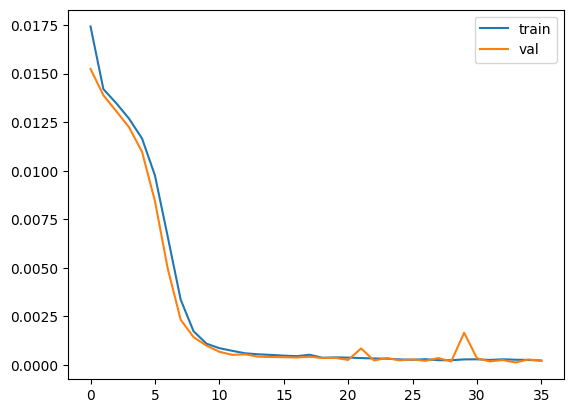

In [101]:
plt.plot(history)
plt.legend(["train", "val"]);

# Evaluation

In [115]:
model.eval()
X_val = torch.load("./data/proof_of_concept/X_val_16_08_old.pt")
x_val = torch.load( "./data/proof_of_concept/x_val_16_08_old.pt")
y_val = torch.load("./data/proof_of_concept/y_val_16_08_old.pt")
preds = model(X_val.to(torch.float32).to(DEVICE), x_val.to(torch.float32).to(DEVICE)).detach().cpu().numpy()
ground_truth = (y_val).numpy()

## MAE

In [119]:
print(np.abs(preds[..., 0] - ground_truth).mean().round(4))

0.0072


## Kernel Density Estimation plot

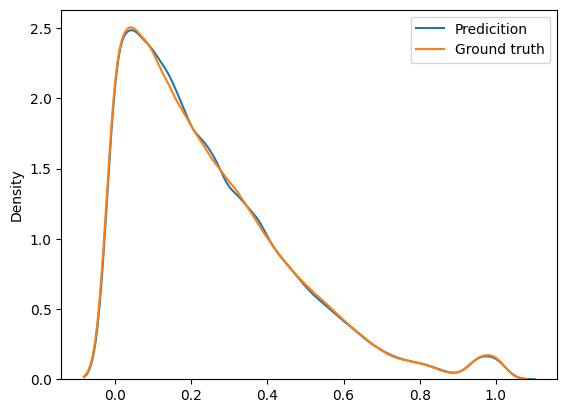

In [112]:
sns.kdeplot(preds)
sns.kdeplot(ground_truth)
plt.legend(["Predicition", "Ground truth"])

## Scatter plot of ground_truth and preds

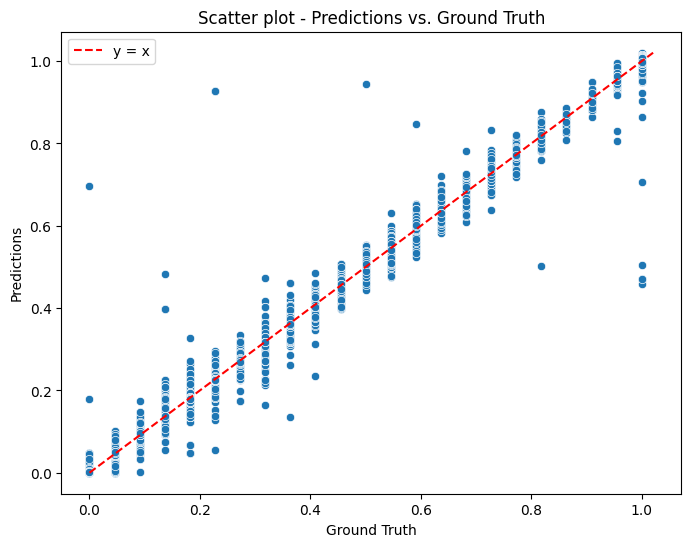

In [113]:
# Create a diagonal line for y = x
x_values = np.linspace(min(preds[..., 0].min(), ground_truth.min()), max(preds[..., 0].max(), ground_truth.max()), 100)
y_values = x_values

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ground_truth, y=preds[..., 0])

# Plot the diagonal line
plt.plot(x_values, y_values, color='red', linestyle='dashed', label='y = x')

# Set labels and title
plt.xlabel('Ground Truth')

plt.ylabel('Predictions')
plt.title('Scatter plot - Predictions vs. Ground Truth')

# Show the plot
plt.legend()
plt.show()